In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [48]:
df = pd.read_excel('data/normalized_data.xlsx')

In [49]:
def make_series(df, category):
    if isinstance(category, str):
        category = [category]
        
    # Выделим нужные данные
    data = df[df['category'].isin(category)]
    
    # Оставим только дату и нормированный кешбек
    data = data[['day', 'cashback_norm']]
    
    # Получим все даты с 01.01.2022 по 31.12.2022
    dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
    
    values = []
    for date in dates:
        temp = np.array([])
        
        # Если дата есть в данных, то добавим значение кешбека
        if date in data['day'].values:
            temp = data[data['day'] == date]['cashback_norm'].values
            
        # Иначе добавим 0
        else:
            temp = np.array([0])
        
        values.append(np.median(temp))
        
    return values
    

In [50]:
# Экспоненциальное сглаживание
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

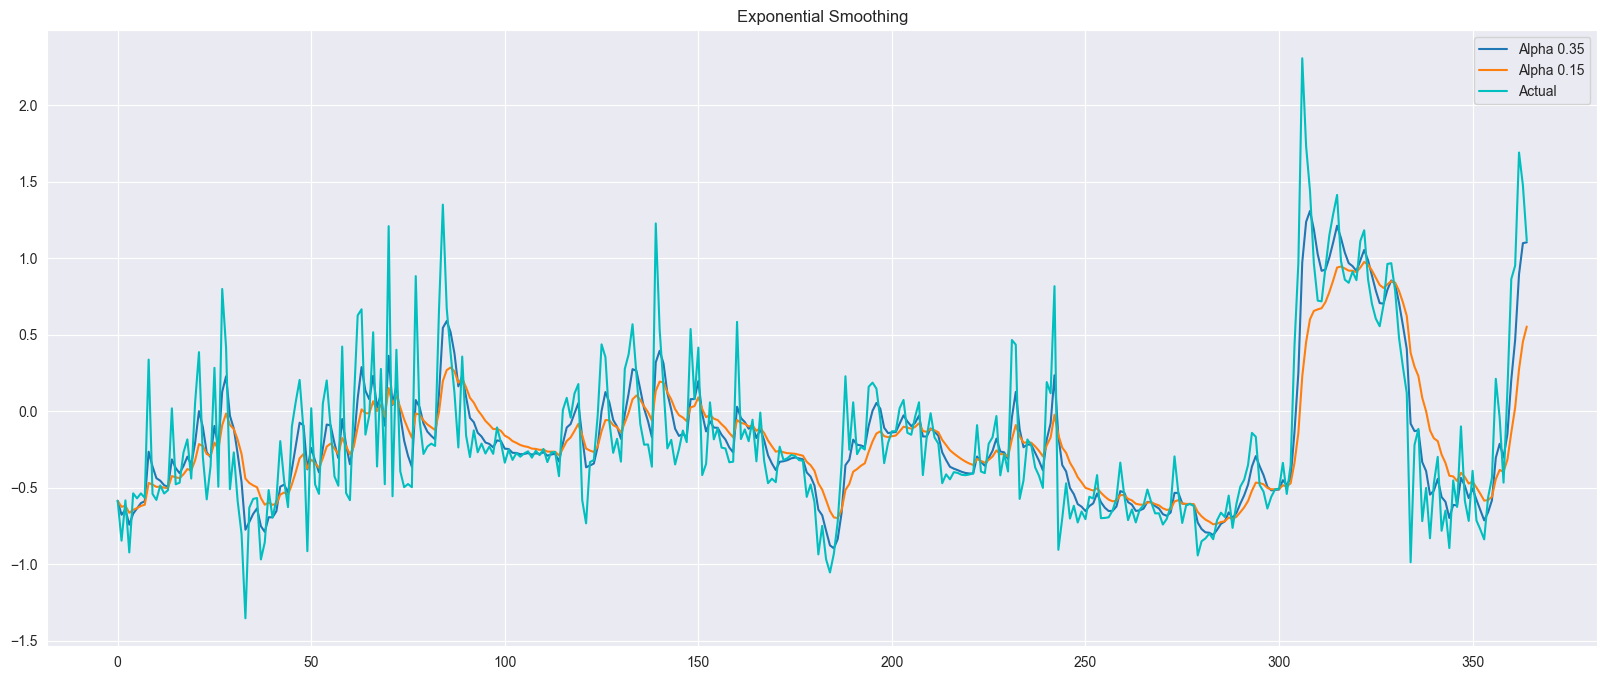

In [52]:
series = make_series(df, 'Бакалейные магазины, супермаркеты')


plt.figure(figsize=(20, 8))
for alpha in [0.35, 0.15]:
    plt.plot(
        exponential_smoothing(series , alpha), label="Alpha {}".format(alpha)
    )
plt.plot(series , "c", label="Actual")
plt.legend(loc="best")
plt.axis("tight")
plt.title("Exponential Smoothing")
plt.grid(True)